In [2]:
import keras

Using TensorFlow backend.


In [3]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

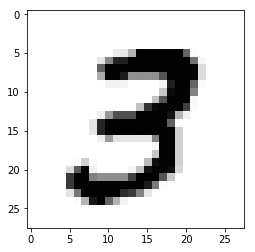

In [13]:
#%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(X_train[7], cmap='Greys')

In [14]:
X_train[7][18]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  86, 252, 252,  74,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [17]:
# prepare X for input neurons
image_size_in_pixels = 28 * 28 # = 784 pixels
X_train_flattened, X_test_flattened= flattenInput(image_size_in_pixels)

# prepare y for output neurons
num_classes = 10
y_train_categorized, y_test_categorized= flattenOutput(num_classes)

In [32]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# The input layer requires the special input_shape parameter which 
# has to match the 784 pixel shape of the training data:
model.add(Dense(units=32,  input_shape=(image_size_in_pixels,),  activation='sigmoid'))
model.add(Dense(units=num_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [33]:
from keras import metrics

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics= [metrics.mae])

history= model.fit(X_train_flattened, y_train_categorized, epochs= 3)

print ("The neural network training is completed!")

Epoch 1/3
60000/60000 [==============================] - 4s 74us/step - loss: 1.3226 - mean_absolute_error: 0.1930
Epoch 2/3
60000/60000 [==============================] - 4s 74us/step - loss: 0.6858 - mean_absolute_error: 0.0906
Epoch 3/3
60000/60000 [==============================] - 4s 74us/step - loss: 0.5356 - mean_absolute_error: 0.0861
The neural network training is completed!


In [34]:
accuraciesForEachEpoch= calcAccuracies()  # 1 - mean_absolute_error 
                                          #     for each epoch
print (accuraciesForEachEpoch)

[0.0, 0.8070010441859563, 0.9094297904570897, 0.9139377793153127]


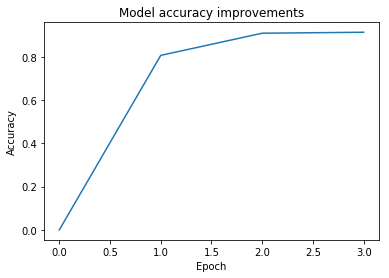

In [35]:
from matplotlib import pyplot as plt
plt.plot(accuraciesForEachEpoch)
plt.title('Model accuracy improvements')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [37]:
recognizeDigit(1)  # should be digit '0'
recognizeDigit(2)  # should be digit '4'
recognizeDigit(3)  # should be digit '1'
recognizeDigit(4)  # should be digit '9'
recognizeDigit(7, verbose= True)  # should be digit '3'

=========> erkannte Ziffer: 0
=========> erkannte Ziffer: 4
=========> erkannte Ziffer: 1
=========> erkannte Ziffer: 9
0   0.002
1   0.002
2   0.007
3   0.114
4   0.001
5   0.007
6   0.000
7   0.005
8   0.030
9   0.007
=========> erkannte Ziffer: 3


3

## helper functions

In [15]:
def flattenInput(noOfInputNeurons):
    X_train_flattened = X_train.reshape(X_train.shape[0], image_size_in_pixels) 
    X_test_flattened = X_test.reshape(X_test.shape[0], image_size_in_pixels)
    return X_train_flattened, X_test_flattened

def flattenOutput(noOfOutputNeurons):
    y_train_categorized = keras.utils.to_categorical(y_train, num_classes)
    y_test_categorized = keras.utils.to_categorical(y_test, num_classes)
    return y_train_categorized, y_test_categorized

In [20]:
def calcAccuracies():
    errors= history.history['mean_absolute_error'].copy()
    i= 0
    errors.insert(0,1.0)
    accuracies= errors
    for val in errors:
        accuracies[i]= 1 - errors[i]
        i= i + 1
    return accuracies


In [36]:
def recognizeDigit(index, verbose= False):
    prediction= model.predict(X_train_flattened)[index]
    i= 0
    maxProbabilty= 0.0
    recognizedDigit= 0
    for probability in prediction:
        if verbose:
            print (str(i) + "   {:,.3f}".format(probability))
        if probability > maxProbabilty:
            maxProbabilty= probability
            recognizedDigit= i
        i= i + 1
    print ("=========> erkannte Ziffer: " + str(recognizedDigit))
    return recognizedDigit